## Step 1:Import libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Step 2: Load Dataset

In [88]:
df = pd.read_excel(r"D:\analytics\data\TB Global Superstore Data.xlsx")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298.0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341.0,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical


In [89]:
df.shape

(51290, 24)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  float64       
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [91]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [92]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [93]:
df.dtypes  #(for date : if not dtype: datetime64[ns]  -   use this code #pd.to_datetime(df['order_date']) )

Row ID                   float64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                 float64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

## Step:3 Data Cleaning

In [94]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [95]:
df.duplicated().sum()

0

In [96]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [97]:
#df.groupby('city')['postal_code'].transform(lambda x: x.fillna(x.mode().iloc[0])) #fill postal code with mode value

In [98]:
df['segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [99]:
df['segment'].nunique()

3

## Step 5: Feature Engineering #Add some new useful columns.

In [100]:
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298.0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7.0,0.0,762.1845,933.57,Critical
1,26341.0,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9.0,0.1,-288.7650,923.63,Critical


In [101]:
# knowing state of Profit like ['Loss','NO_Profit','Gain']
df['profit_margin'] = df['profit'] / df['sales'] 
df['profit_margin'].head()

0    0.330000
1   -0.077847
2    0.177766
3   -0.033376
4    0.109963
Name: profit_margin, dtype: float64

In [102]:
# Knowing Cost of Product
df['cost'] = df['sales'] -  df['profit']

In [103]:
# Knowing rate of Profit for Cost
df['profit_rate'] = df['profit'] /df ['cost']

In [104]:
# Knowing Year of Order & Month of order
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month

In [105]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'profit_margin', 'cost',
       'profit_rate', 'order_year', 'order_month'],
      dtype='object')

In [106]:
# Knowing the product delivery time to the client
df['no.of days'] = df['ship_date'] - df['order_date']

In [107]:
df['no.of days'].dtype

dtype('<m8[ns]')

In [108]:
df = df.drop(columns = ['no.of days'])

In [109]:
df['no._of_days'] = df['ship_date'] - df['order_date']
df['no._of_days'].dtypes

dtype('<m8[ns]')

In [110]:
df['no._of_days']

0       0 days
1       2 days
2       1 days
3       2 days
4       1 days
         ...  
51285   0 days
51286   4 days
51287   0 days
51288   4 days
51289   4 days
Name: no._of_days, Length: 51290, dtype: timedelta64[ns]

## Step 6: Exploratory Data Analysis (EDA)

In [111]:
df[['sales','profit','quantity']].sum()

sales       1.264250e+07
profit      1.467457e+06
quantity    1.783120e+05
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

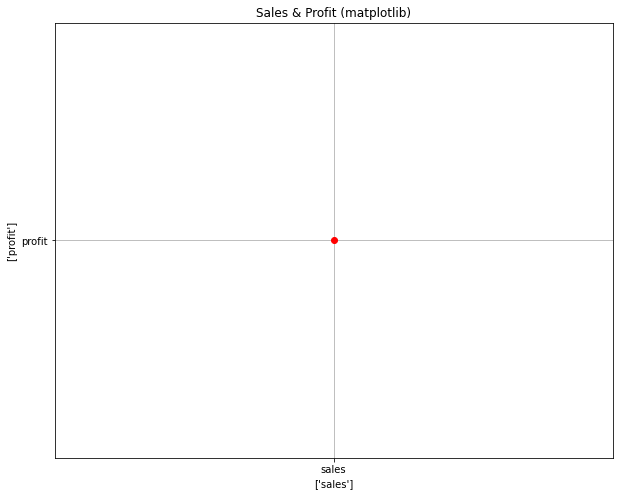

In [112]:
# MATPLOTLIB 
plt.figure(figsize = (10,8))
plt.plot(['sales'],['profit'],color = 'red', marker = 'o', linestyle='--')
plt.xlabel(['sales'])
plt.ylabel(['profit'])
plt.title("Sales & Profit (matplotlib)")
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

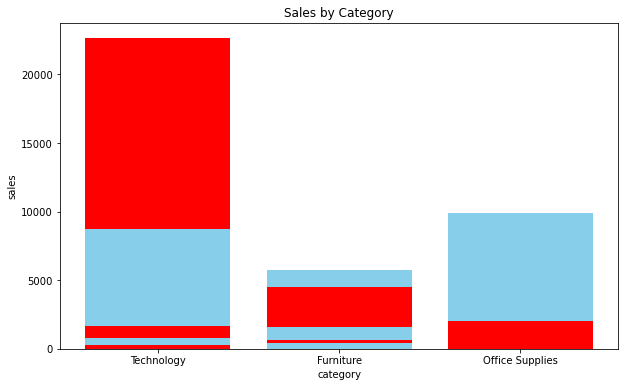

In [113]:

plt.figure(figsize = (10,6))
plt.bar(df['category'], df['sales'], color = ['skyblue','red'])
plt.title("Sales by Category")
plt.xlabel('category')
plt.ylabel('sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

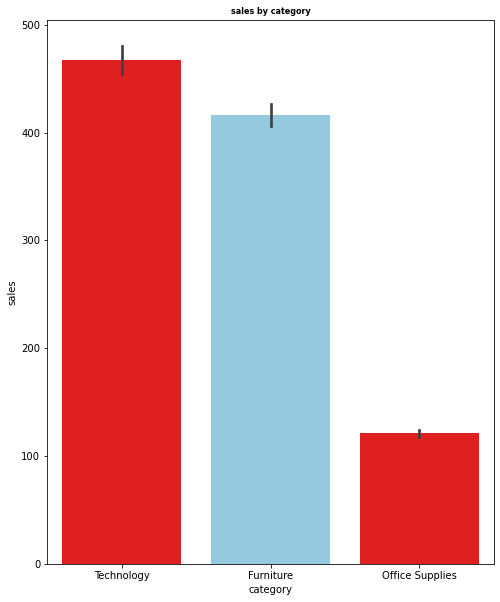

In [114]:
#seaborn
plt.figure(figsize = (8,10))
sns.barplot(x = 'category', y = 'sales', data= df, palette = ['red','skyblue'])
plt.title('sales by category', fontsize = 8, fontweight = 'bold')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

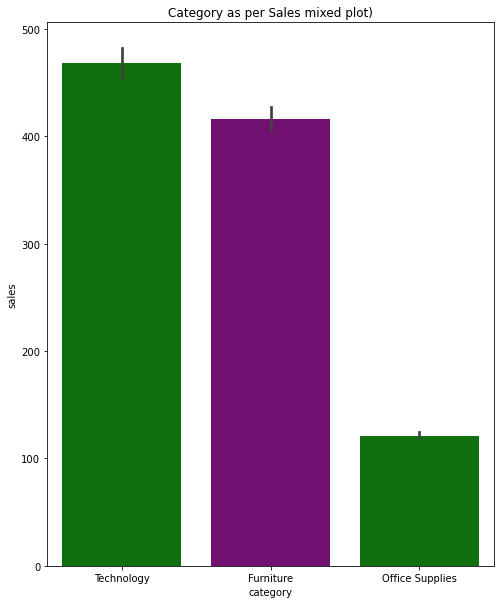

In [116]:
plt.figure(figsize = (8,10))
sns.barplot(x='category', y= 'sales', data = df, palette = ['green', 'purple'])
plt.title('Category as per Sales mixed plot)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

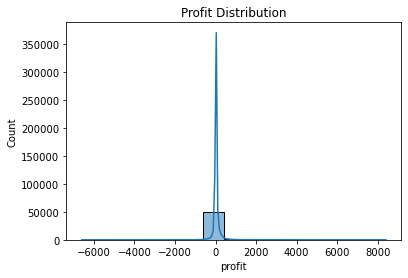

In [119]:
sns.histplot(x='profit',data = df,kde=True, bins = 15) #Many products or orders have very low profit or small losses.
plt.title('Profit Distribution')                        #Only a few have high profit or high loss (outliers on both sides).
plt.show

In [120]:
df.head(2)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,discount,profit,shipping_cost,order_priority,profit_margin,cost,profit_rate,order_year,order_month,no._of_days
0,32298.0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,0.330000,1547.4655,0.492537,2012,7,0 days
1,26341.0,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,-0.077847,3998.1600,-0.072224,2013,2,2 days


In [202]:
df[['profit','sales','quantity']].describe()

,profit,sales,quantity
count,51290.000000,51290.000000,51290.000000
mean,28.610982,246.490581,3.476545
std,174.340972,487.565361,2.278766
min,-6599.978000,0.444000,1.000000
25%,0.000000,30.758625,2.000000
50%,9.240000,85.053000,3.000000
75%,36.810000,251.053200,5.000000
max,8399.976000,22638.480000,14.000000


## Basic Analysis

In [129]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'profit_margin', 'cost',
       'profit_rate', 'order_year', 'order_month', 'no._of_days'],
      dtype='object')

In [133]:
#What are the top 5 products by sales?
product_sales = df.groupby('product_id')['sales'].sum().reset_index()
top_5_product = product_sales.sort_values(by = 'sales',ascending = False).head(5)
top_5_product

,product_id,sales
8969,TEC-CO-10004722,61599.8240
10157,TEC-PH-10004664,30041.5482
3825,OFF-BI-10003527,27453.3840
9294,TEC-MA-10002412,22638.4800
10171,TEC-PH-10004823,22262.1000


In [143]:
#Which category has the highest total profit?
highest_profit_category = df.groupby('category')['profit'].sum().sort_values(ascending = False)
highest_profit_category

category
Technology         663778.73318
Office Supplies    518473.83430
Furniture          285204.72380
Name: profit, dtype: float64

In [147]:
#What is the average discount offered per category?
avg_dis_category = df.groupby('category')['discount'].mean().reset_index()
avg_dis_category

,category,discount
0,Furniture,0.168087
1,Office Supplies,0.137409
2,Technology,0.135342


In [150]:
#How many unique customers and regions are there in the dataset?
df[['customer_id','region']].nunique()

customer_id    1590
region           13
dtype: int64

In [151]:
df['category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

## Grouping & Aggregation

In [156]:
#Calculate total Sales, Profit, and Quantity per Region.
df.groupby('region')[['sales','profit','quantity']].sum().reset_index()

,region,sales,profit,quantity
0,Africa,7.837732e+05,88871.63100,10564.0
1,Canada,6.692817e+04,17817.39000,833.0
2,Caribbean,3.242809e+05,34571.32104,6299.0
3,Central,2.822303e+06,311403.98164,41762.0
4,Central Asia,7.528266e+05,132480.18700,7715.0
5,EMEA,8.061613e+05,43897.97100,11517.0
6,East,6.787812e+05,91522.78000,10618.0
7,North,1.248166e+06,194597.95252,18021.0
8,North Asia,8.483098e+05,165578.42100,8851.0
9,Oceania,1.100185e+06,120089.11200,12838.0


In [169]:
#Calculate monthly Sales and Profit trends (use Order Date).
#df['order_month'] = df[order_date].dt.month
df.groupby(['order_month','order_year'])[['sales','profit']].agg(['sum','mean']).reset_index()

order_month order_year         sales                   profit           
                                    sum        mean          sum       mean
0            1       2011   98898.48886  228.402977   8321.80096  19.218940
1            1       2012  135780.72024  251.912282  10401.63764  19.298029
2            1       2013  199185.90738  280.939221  26810.55968  37.814612
3            1       2014  241268.55566  262.819777  28001.38626  30.502599
4            2       2011   91152.15698  241.143272  12417.90698  32.851606
5            2       2012  100510.21698  234.289550  15000.09618  34.965259
6            2       2013  167239.65040  276.429174  23762.49610  39.276853
7            2       2014  184837.35556  244.493857  19751.69996  26.126587
8            3       2011  145729.36736  270.369884  15303.56826  28.392520
9            3       2012  163076.77116  246.339533  17992.91756  27.179634
10           3       2013  198594.03012  259.261136  23433.77462  30.592395
11           3       2014  263100.77262  246.349038  37357.26052  34.978708
12           4       2011  116915.76418  207.297454  12902.32438  22.876462
13           4       2012  161052.26952  245.132830  17366.96722  26.433740
14           4       2013  177821.31684  226.523970  19462.03844  24.792406
15           4       2014  242771.86130  230.991305  23782.30120  22.628260
16           5       2011  146747.83610  259.271795  12183.82870  21.526199
17           5       2012  208364.89124  248.053442  29876.70374  35.567504
18           5       2013  260498.56470  246.450865  28495.69410  26.959029
19           5       2014  288401.04614  224.611407  33953.55774  26.443581
20           6       2011  215207.38022  234.686347  23415.24702  25.534621
21           6       2012  256175.69842  225.506777  34407.15362  30.287987
22           6       2013  396519.61190  259.163145  45478.41340  29.724453
23           6       2014  401814.06310  229.870745  43778.60280  25.044967
24           7       2011  115510.41912  233.354382   5585.00352  11.282835
25           7       2012  145236.78512  220.389659  15585.38842  23.650058
26           7       2013  229928.95200  248.571840  28863.82720  31.204138
27           7       2014  258705.68048  237.999706  28035.87258  25.791971
28           8       2011  207581.49122  236.425389  23713.66772  27.008733
29           8       2012  303142.94238  279.910381  43573.87858  40.234422
30           8       2013  326488.78936  226.413862  31023.66846  21.514333
31           8       2014  456619.94236  272.608921  53542.89496  31.965907
32           9       2011  290214.45534  275.869254  35776.88394  34.008445
33           9       2012  289389.16564  236.622376  27776.18034  22.711513
34           9       2013  376619.24568  223.911561  38905.66778  23.130599
35           9       2014  481157.24370  238.432727  67979.45110  33.686547
36          10       2011  199071.26404  257.198016  25963.41834  33.544468
37          10       2012  252939.85020  255.494798  30662.88270  30.972609
38          10       2013  293406.64288  266.733312  42433.22258  38.575657
39          10       2014  422766.62916  260.004077  58209.83476  35.799406
40          11       2011  298496.53752  262.068953  32709.17772  28.717452
41          11       2012  323512.41690  221.583847  31820.72180  21.795015
42          11       2013  373989.36010  234.329173  48062.99670  30.114660
43          11       2014  555279.02700  258.630194  62856.58790  29.276473
44          12       2011  333925.73460  264.390922  40647.98400  32.183677
45          12       2012  338256.96660  263.440005  32950.75130  25.662579
46          12       2013  405454.37802  253.092620  50202.87112  31.337622
47          12       2014  503143.69348  233.694238  46916.52068  21.791231

In [172]:
#Find which Segment (Consumer, Corporate, Home Office) generates the most profit
df.groupby('segment')['profit'].sum().reset_index()

,segment,profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


## Visualization

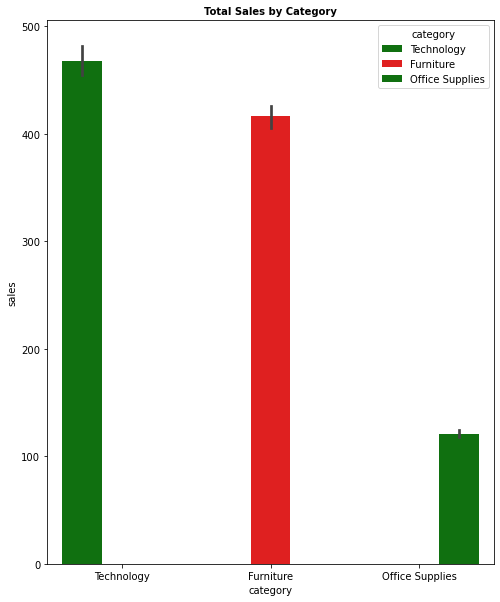

In [188]:
#Plot a bar chart showing total sales by category.
plt.figure(figsize = (8,10))
sns.barplot(x = 'category', y= 'sales', data = df, hue = 'category',palette = ['green','red'])
plt.title('Total Sales by Category',fontsize = 10, fontweight = 'bold')
plt.show()

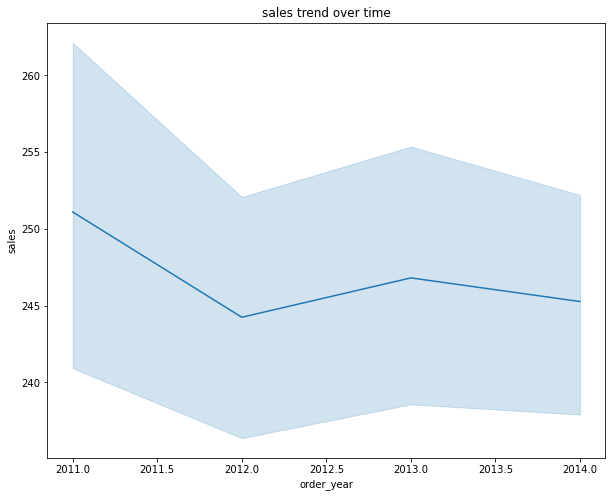

In [186]:
#Plot a line chart showing sales trend over time
plt.figure(figsize = (10,8))
sns.lineplot(y='sales',x = 'order_year', data = df, palette = 'Blue')
plt.title('sales trend over time')
plt.show()

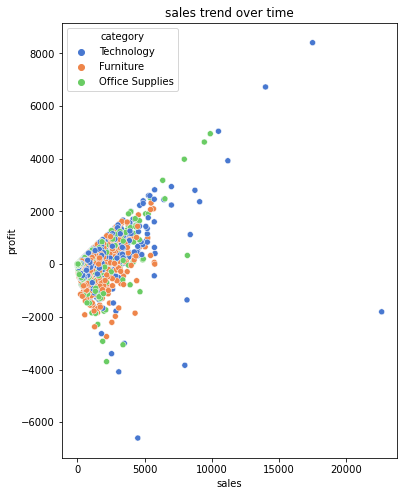

In [189]:
#Plot a scatter plot of Sales vs Profit to identify profitable products.
plt.figure(figsize = (6,8))
sns.scatterplot(y= 'profit', x = 'sales', data = df, hue = 'category', palette = 'muted' )
plt.title('sales trend over time')
plt.show()


In [196]:
#Create a pivot table showing Sales by Category and Region.
sales_pivot = df.pivot_table(index='category', columns='region', values='sales', aggfunc='sum', fill_value=0)
sales_pivot

region,Africa,Canada,Caribbean,Central,Central Asia,EMEA,East,North,North Asia,Oceania,South,Southeast Asia,West
category,,,,,,,,,,,,,
Furniture,194650.635,10595.28,118372.40000,8.604176e+05,284362.902,228620.736,208291.204,377629.91800,335716.461,410468.004,515749.61600,313386.7035,252612.7435
Office Supplies,266755.533,30034.08,89575.41600,9.234353e+05,162766.350,276685.992,205516.055,374733.45300,198554.775,281713.626,515161.33900,241285.0815,220853.2490
Technology,322367.043,26298.81,116333.04504,1.038450e+06,305697.315,300854.583,264973.981,495802.23152,314038.545,408002.982,569996.08588,329751.3840,251991.8320


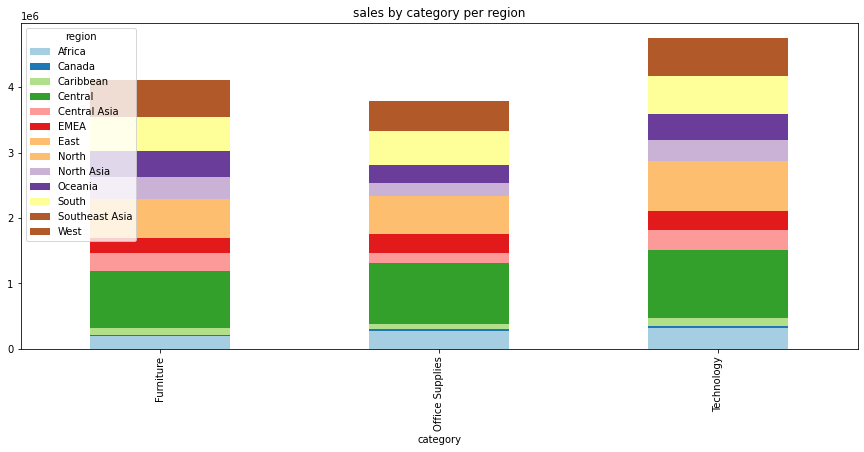

In [199]:
#Create a stacked bar chart showing sales by category per region.
sales_pivot.plot(kind='bar', stacked=True, figsize=(15,6), colormap='Paired')
plt.title('sales by category per region')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

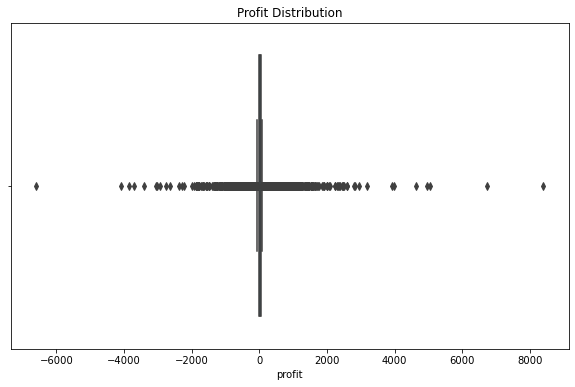

In [201]:
#Identify outliers in Profit using a boxplot.
plt.figure(figsize=(10,6))
sns.boxplot(x='profit', data=df)#Many products or orders have very low profit or small losses.
plt.title('Profit Distribution')                        #Only a few have high profit or high loss (outliers on both sides).
plt.show